In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from matplotlib.backends.backend_pdf import PdfPages
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
#pd.options.mode.copy_on_write = True
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
import multiprocessing as mp
from tqdm import tqdm
cosmo = FlatLambdaCDM(name='Planck18', H0=67.66, Om0=0.30966, Tcmb0=2.7255, Neff=3.046, m_nu=[0.  , 0.  , 0.06]* u.eV, Ob0=0.04897)
cores = 8
plt.style.use('ggplot')

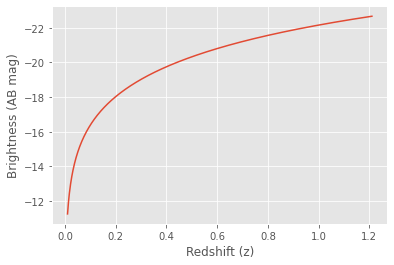

In [9]:
z = np.linspace(0.01, 1.21, 1001)
mag = 22 - np.array(cosmo.distmod(z))
plt.plot(z, mag, label = "Transient (m = 22)")
plt.xlabel("Redshift (z)")
plt.ylabel("Brightness (AB mag)")
plt.gca().invert_yaxis()

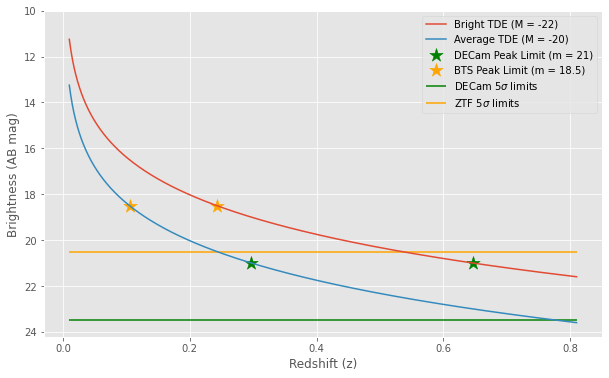

In [38]:
z = np.linspace(0.01, 0.81, 1001)
TDE_Mag_high = -22
TDE_Mag_low = -20
dist_mod = np.array(cosmo.distmod(z))

curfig = plt.figure(figsize=[10,6])

plt.plot(z, dist_mod + TDE_Mag_high, label = "Bright TDE (M = -22)")
plt.plot(z, dist_mod + TDE_Mag_low, label = "Average TDE (M = -20)")

DECam_peak = 21
BTS_peak = 18.5

DECam_z = [z[np.argmin(np.abs((dist_mod + TDE_Mag_high) - DECam_peak))], z[np.argmin(np.abs((dist_mod + TDE_Mag_low) - DECam_peak))]]
BTS_z = [z[np.argmin(np.abs((dist_mod + TDE_Mag_high) - BTS_peak))], z[np.argmin(np.abs((dist_mod + TDE_Mag_low) - BTS_peak))]]

plt.scatter(DECam_z, [DECam_peak, DECam_peak], marker = "*", s = 200, label = "DECam Peak Limit (m = 21)", color = "green")
plt.scatter(BTS_z, [BTS_peak, BTS_peak], marker = "*", s = 200, label = "BTS Peak Limit (m = 18.5)", color = "orange")

DECam_limit = 23.5
ZTF_limit = 20.5

plt.hlines(DECam_limit, np.min(z), np.max(z), color = "green", label = "DECam $5\sigma$ limits")
plt.hlines(ZTF_limit, np.min(z), np.max(z), color = "orange", label = "ZTF $5\sigma$ limits")

plt.legend()

plt.xlabel("Redshift (z)")
plt.ylabel("Brightness (AB mag)")

plt.xticks(np.arange(0, np.max(z), step=0.2))
plt.yticks(np.arange(10, 24.1, step=2))

plt.gca().invert_yaxis()

plt.savefig("DECam_vs_ZTF_AT2022cmc.png", dpi = 300)

In [39]:
"""
Created on Mon Sep 23 11:56:26 2024

@author: ekhammer
"""
from scipy.stats import gaussian_kde
from matplotlib import gridspec


zs = [0.136,
 0.2515,
 0.326,
 0.3698,
 0.1855,
 0.1696,
 0.4046,
 0.1089,
 0.064,
 0.1146,
 0.184,
 0.0436029,
 0.0205778,
 0.0484,
 0.2326,
 0.018,
 0.059,
 0.0262,
 0.07897,
 0.108,
 0.0163,
 0.1655,
 0.071,
 0.051,
 0.088,
 0.212,
 0.0457266,
 0.138,
 0.091,
 0.193,
 0.1206,
 0.0222,
 0.0512,
 0.074,
 0.0813,
 0.148,
 0.152,
 0.117,
 0.0151,
 0.062,
 0.0874,
 0.068,
 0.088,
 0.16,
 0.07,
 0.093,
 0.084,
 0.07,
 0.159,
 0.0565,
 0.345,
 0.277,
 0.02741,
 0.434,
 0.0325,
 0.338,
 0.133,
 0.155,
 0.19,
 0.017,
 0.456,
 0.126,
 0.186,
 0.358,
 0.153,
 0.408,
 0.579,
 0.047,
 0.105,
 0.485,
 0.073,
 0.059,
 0.175,
 0.176,
 0.106,
 0.286,
 0.053,
 0.31,
 0.178,
 0.178,
 0.152,
 0.0284,
 0.0378,
 0.107,
 0.052,
 0.052,
 0.052,
 0.052,
 0.052,
 0.052,
 0.052,
 0.052,
 0.052,
 0.052,
 0.1618,
 0.34,
 0.5167,
 0.08,
 0.08,
 0.34,
 0.34,
 0.0805,
 0.0805,
 0.0805,
 0.0805,
 0.0805,
 0.0805]
mags = [-18.86496181578528,
 -20.608572034014013,
 -17.8734688440148,
 -18.46554084192745,
 -18.269425632691195,
 -20.216891268285128,
 -20.562324769059902,
 -19.344741717698465,
 -19.754304193358724,
 -20.235921313292792,
 -20.846956257676283,
 -19.612574932319195,
 -18.237128065308962,
 -20.07105791836857,
 -23.33919638059616,
 -20.164630701937124,
 -19.900380673938955,
 -20.513298861813198,
 -18.245574750354216,
 -19.522395618660425,
 -17.783702376120964,
 -21.090495311775687,
 -19.514209957415062,
 -19.751523082210735,
 -20.34862229945198,
 -21.569858265156178,
 -20.481147915138468,
 -20.72905563740655,
 -20.050768816384522,
 -20.205888428093978,
 -20.120547254544995,
 -20.489992516960957,
 -19.836951910811184,
 -19.98569735635263,
 -18.49108637703591,
 -20.034391278539022,
 -20.427486565744463,
 -19.851819729375432,
 -18.686983495936897,
 -19.21079363211533,
 -18.774091063581814,
 -18.51374181855132,
 -20.154535300695876,
 -20.575384513789675,
 -18.26754723057555,
 -19.624456006951053,
 -20.76443570056407,
 -19.857094419676788,
 -20.747783674438253,
 -19.549191761524284,
 -22.43473603776812,
 -22.287358027719474,
 -17.806842315140766,
 -22.642353096288627,
 -19.266173690216885,
 -22.898591025050482,
 -20.279147087653445,
 -20.398889321857542,
 -21.341727388943145,
 -18.119754442573374,
 -22.451398099033536,
 -19.460305217851314,
 -20.5691218253622,
 -21.51572955564593,
 -20.216409690293563,
 -21.698841106222936,
 -22.594984565043873,
 -18.786125264084554,
 -18.90077517448573,
 -22.15384121272797,
 -19.58881975077619,
 -19.381620077507268,
 -19.752139768529545,
 -20.332043369058862,
 -19.58563005297489,
 -22.227637227349714,
 -18.8461133911871,
 -22.20411251143464,
 -20.336050518633918,
 -20.336050518633918,
 -20.550520105146063,
 -18.988911420183822,
 -19.452822565990452,
 -19.675881137829773,
 -18.419710281576908,
 -18.419710281576908,
 -18.419710281576908,
 -18.419710281576908,
 -18.419710281576908,
 -18.419710281576908,
 -18.419710281576908,
 -18.419710281576908,
 -18.419710281576908,
 -18.419710281576908,
 -19.246047955012603,
 -22.610896788568112,
 -23.42741171305136,
 -20.185052994357413,
 -20.185052994357413,
 -21.50529106619207,
 -21.50529106619207,
 -18.44176580259996,
 -18.44176580259996,
 -18.44176580259996,
 -18.44176580259996,
 -18.44176580259996,
 -18.44176580259996]

In [40]:
21.207 - cosmo.distmod(1.1988).value

-23.438134406404025

In [41]:
z = np.linspace(0.01, 0.61, 1001)
ztf_abs_mag = ZTF_limit - np.array(cosmo.distmod(z))
DECam_abs_mag = DECam_limit - np.array(cosmo.distmod(z))

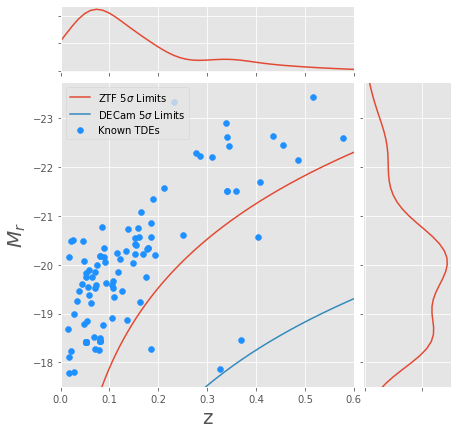

In [42]:
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 0.9], height_ratios=[0.65,3])
gs.update(hspace=0.05, wspace=0.05)

fig = plt.figure(figsize=(7, 7))

ax = plt.subplot(gs[1, 0])


axr = plt.subplot(gs[1,1], sharey=ax)

mag_lin = np.linspace(-24, -17, 50)
vsig_kde = gaussian_kde(mags)
axr.plot(vsig_kde.evaluate(mag_lin), mag_lin)

axz = plt.subplot(gs[0, 0], sharex=ax)
z_lin = np.linspace(0, 0.6, 50)
vsig_kde = gaussian_kde(zs)
axz.plot(z_lin, vsig_kde.evaluate(z_lin))

ax.scatter(zs, mags, color = "dodgerblue", label = "Known TDEs")

ax.plot(z, ztf_abs_mag, label = "ZTF $5\sigma$ Limits")
ax.plot(z, DECam_abs_mag, label = "DECam $5\sigma$ Limits")
ax.legend()

ax.set_xlim(0, 0.6)
ax.set_ylim(-23.75, -17.5)
ax.invert_yaxis()

axr.tick_params(labelbottom=False, labelleft=False)
axz.tick_params(labelbottom=False, labelleft=False)

ax.set_xlabel('z', fontsize=20)
ax.set_ylabel(r'$M_r$', fontsize=20)

plt.savefig('mag_vs_z.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
DECam_u_filter = pd.read_table('scidoc0471.txt', sep='\s+')
DECam_all_filters = pd.read_table('scidoc0472.txt', sep='\s+')

In [84]:
filters = "ugri"
filters_all = "ugrizY"

In [90]:
p = PdfPages('filter_redshifts.pdf')
for n in range(len(filters)):
    i = filters[n]
    j = filters_all[n+1]
    fig = plt.figure(figsize=(14, 7))
    
    plt.plot(DECam_all_filters["w"], DECam_all_filters[j], label = j)
    
    plt.plot(DECam_all_filters["w"] * 1.1, DECam_all_filters[i], label = "{} z = 1.1".format(i))
    
    plt.plot(DECam_all_filters["w"] * 1.2, DECam_all_filters[i], label = "{} z = 1.2".format(i))
    
    plt.plot(DECam_all_filters["w"] * 1.3, DECam_all_filters[i], label = "{} z = 1.3".format(i))

    #plt.plot(DECam_all_filters["w"] * 1.4, DECam_all_filters[i], label = "{} z = 1.4".format(i))
    
    plt.legend()
    p.savefig(fig)
    plt.close()
p.close() 

In [73]:
i

'Y'